EDA of Sown Area for Cucumber and Tomato

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
tomato_area_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/tomato_sown_area.csv"
cucumber_area_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/cucmber_sown_area.csv"
potato_area_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/potato_sownarea.csv"
onion_area_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/onion_sownarea.csv"

tom = pd.read_csv(tomato_area_path)
cuc = pd.read_csv(cucumber_area_path)
pot = pd.read_csv(potato_area_path)
oni = pd.read_csv(onion_area_path)

tom.iloc[:,1:] = tom.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
cuc.iloc[:,1:] = cuc.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
pot.iloc[:,1:] = pot.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
oni.iloc[:,1:] = oni.iloc[:,1:].apply(pd.to_numeric, errors="coerce")


In [3]:
def load_and_melt_area(path, crop):
    df = pd.read_csv(path)
    df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
    df_melt = df.melt(id_vars=df.columns[0], var_name='Year', value_name='Sown_Area')
    df_melt.rename(columns={df.columns[0]: 'Region'}, inplace=True)
    df_melt['Crop'] = crop
    return df_melt

df_list_area = []
df_list_area.append(load_and_melt_area(tomato_area_path, 'Tomato'))
df_list_area.append(load_and_melt_area(cucumber_area_path, 'Cucumber'))
df_list_area.append(load_and_melt_area(potato_area_path, 'Potato'))
df_list_area.append(load_and_melt_area(onion_area_path, 'Onion'))
df_area = pd.concat(df_list_area, ignore_index=True)
df_area['Year'] = pd.to_numeric(df_area['Year'], errors='coerce')
df_area.dropna(subset=['Year','Sown_Area'], inplace=True)
df_area.head()


,Region,Year,Sown_Area,Crop
0,Republic of Azerbaijan,2000,18903.0,Tomato
1,Baku city,2000,19.0,Tomato
2,Nakhchivan Autonomous Republic,2000,1500.0,Tomato
4,Babak district,2000,585.0,Tomato
5,Julfa district,2000,89.0,Tomato


In [4]:
df_area.info()
df_area.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7639 entries, 0 to 8495
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     7639 non-null   object 
 1   Year       7639 non-null   int64  
 2   Sown_Area  7639 non-null   float64
 3   Crop       7639 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 298.4+ KB


,Year,Sown_Area
count,7639.000000,7639.000000
mean,2011.787799,1039.979539
std,6.844675,4286.442921
min,2000.000000,0.100000
25%,2006.000000,49.500000
50%,2012.000000,198.000000
75%,2018.000000,634.500000
max,2023.000000,70690.000000


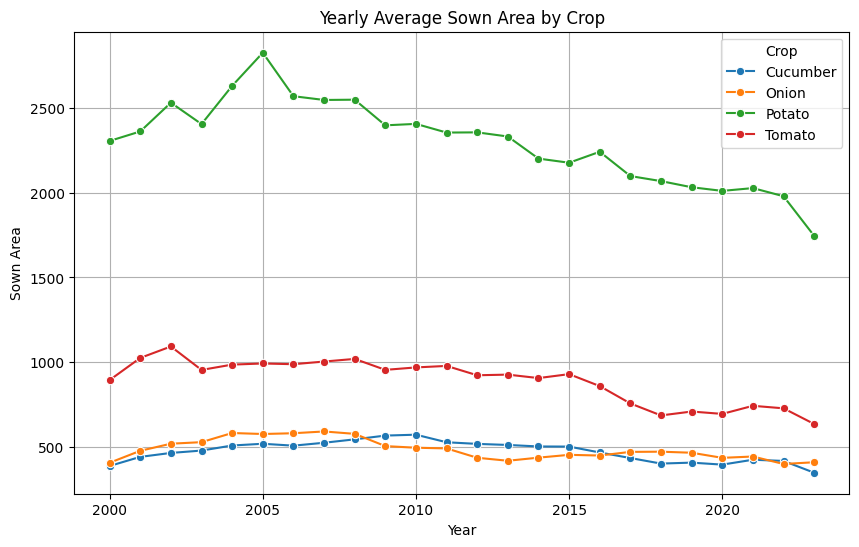

In [5]:
grouped_area = df_area.groupby(['Year','Crop'])['Sown_Area'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_area, x='Year', y='Sown_Area', hue='Crop', marker='o')
plt.title('Yearly Average Sown Area by Crop')
plt.xlabel('Year')
plt.ylabel('Sown Area')
plt.grid(True)
plt.show()


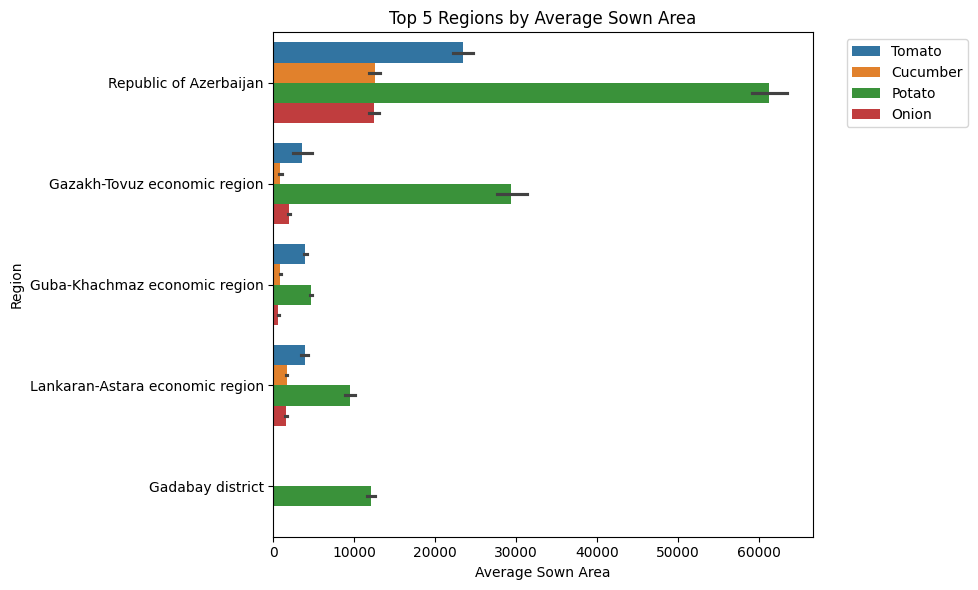

In [6]:
top5_regions_area = df_area.groupby('Region')['Sown_Area'].mean().nlargest(5).index
df_top5_area = df_area[df_area['Region'].isin(top5_regions_area)]
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5_area, x='Sown_Area', y='Region', hue='Crop', estimator=np.mean)
plt.title('Top 5 Regions by Average Sown Area')
plt.xlabel('Average Sown Area')
plt.ylabel('Region')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
df_area_filtered = df_area[df_area['Region'] != "Republic of Azerbaijan"]

region_area = df_area_filtered.groupby(['Crop', 'Region'])['Sown_Area'].sum().reset_index()

highest_area_regions = region_area.loc[region_area.groupby('Crop')['Sown_Area'].idxmax()]

print("Regions with highest total sown area for each crop (excluding 'Republic of Azerbaijan'):")
print(highest_area_regions)


Regions with highest total sown area for each crop (excluding 'Republic of Azerbaijan'):
         Crop                          Region  Sown_Area
54   Cucumber  Nakhchivan Autonomous Republic    42428.0
124     Onion        Karabakh economic region    93116.8
193    Potato    Gazakh-Tovuz economic region   704330.1
284    Tomato   Guba-Khachmaz economic region    94960.1
